<a href="https://colab.research.google.com/github/Developer-107/SpaceMissionAnalysis/blob/main/Fatal_Force_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 83.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
# Shape of each data
print(df_hh_income.shape)
print(df_fatalities.shape)
print(df_pct_completed_hs.shape)
print(df_pct_poverty.shape)
print(df_share_race_city.shape)

(29322, 3)
(2535, 14)
(29329, 3)
(29329, 3)
(29268, 7)


In [6]:
print(df_hh_income.columns)
print(df_fatalities.columns)
print(df_pct_completed_hs.columns)
print(df_pct_poverty.columns)
print(df_share_race_city.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')


In [7]:
print(df_pct_completed_hs.duplicated().sum)
print(df_pct_poverty.duplicated().sum)
print(df_share_race_city.duplicated().sum)
print(df_hh_income.duplicated().sum)
print(df_fatalities.duplicated().sum)
print(df_fatalities.isna().sum)
print(df_pct_completed_hs.isna().sum)
print(df_pct_poverty.isna().sum)
print(df_share_race_city.isna().sum)
print(df_hh_income.isna().sum)

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
29324    False
29325    False
29326    False
29327    False
29328    False
Length: 29329, dtype: bool>
<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
29324    False
29325    False
29326    False
29327    False
29328    False
Length: 29329, dtype: bool>
<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
29263    False
29264    False
29265    False
29266    False
29267    False
Length: 29268, dtype: bool>
<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
29317    False
29318    False
29319    False
29320    False
29321    False
Length: 29322, dtype: bool>
<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2530

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [8]:
df_fatalities.dropna(inplace=True)
df_pct_completed_hs.dropna(inplace=True)
df_pct_poverty.dropna(inplace=True)
df_share_race_city.dropna(inplace=True)
df_hh_income.dropna(inplace=True)

In [9]:
print(df_fatalities.head())
print(df_pct_completed_hs.head())
print(df_pct_poverty.head())
print(df_share_race_city.head())
print(df_hh_income.head())
print(df_fatalities.shape)
print(df_pct_completed_hs.shape)
print(df_pct_poverty.shape)
print(df_share_race_city.shape)
print(df_hh_income.shape)

   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun 53.00   
1   4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4   9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2 

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [10]:
df_pct_poverty_sorted = df_pct_poverty.sort_values(by='poverty_rate', ascending=True)
for i in df_pct_poverty_sorted['poverty_rate']:
  if i == "-":
    df_pct_poverty_sorted['poverty_rate'] = df_pct_poverty_sorted['poverty_rate'].replace(i, 0)

df_pct_poverty_sorted['poverty_rate'] = df_pct_poverty_sorted['poverty_rate'].astype(float)
df_pct_poverty_sorted

,Geographic Area,City,poverty_rate
25810,TX,Rafael Pena CDP,0.00
25652,TX,Northridge CDP,0.00
3076,CA,Robinson Mill CDP,0.00
676,AK,Eureka Roadhouse CDP,0.00
25674,TX,Olivia Lopez de Gutierrez CDP,0.00
...,...,...,...
26509,UT,Randlett CDP,93.50
20428,OK,Badger Lee CDP,93.80
27738,WA,Outlook CDP,93.80
23716,SD,Allen CDP,94.10


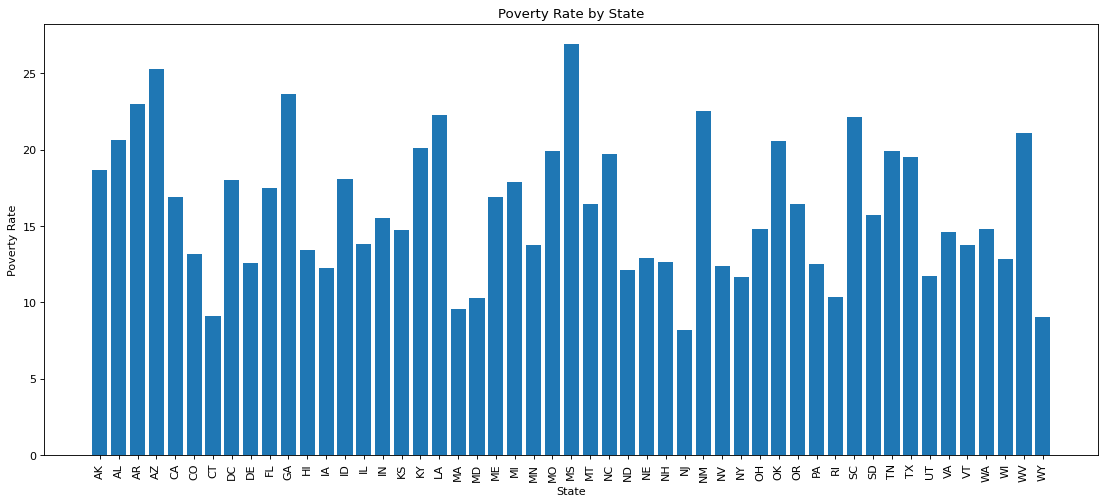

In [11]:
plt.figure(figsize=(17, 7), dpi=80)
df_pct_poverty_sorted_states = df_pct_poverty_sorted.groupby('Geographic Area').poverty_rate.mean()
plt.bar(df_pct_poverty_sorted_states.index, df_pct_poverty_sorted_states.values)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate by State')
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [12]:
df_pct_completed_hs_sorted = df_pct_completed_hs.sort_values(by='percent_completed_hs', ascending=True)
for i in df_pct_completed_hs_sorted['percent_completed_hs']:
  if i == "-":
    df_pct_completed_hs_sorted['percent_completed_hs'] = df_pct_completed_hs_sorted['percent_completed_hs'].replace(i, 0)
df_pct_completed_hs_sorted['percent_completed_hs'] = df_pct_completed_hs_sorted['percent_completed_hs'].astype(float)
df_pct_completed_hs_sorted

,Geographic Area,City,percent_completed_hs
14024,MO,Goss town,0.00
770,AK,Loring CDP,0.00
14570,MO,Tarrants village,0.00
1113,AZ,Hunter Creek CDP,0.00
16280,NJ,Ross Corner CDP,0.00
...,...,...,...
7176,IL,Scott AFB CDP,99.80
26212,TX,West Lake Hills city,99.80
23070,PA,Toftrees CDP,99.80
25983,TX,Serenada CDP,99.90


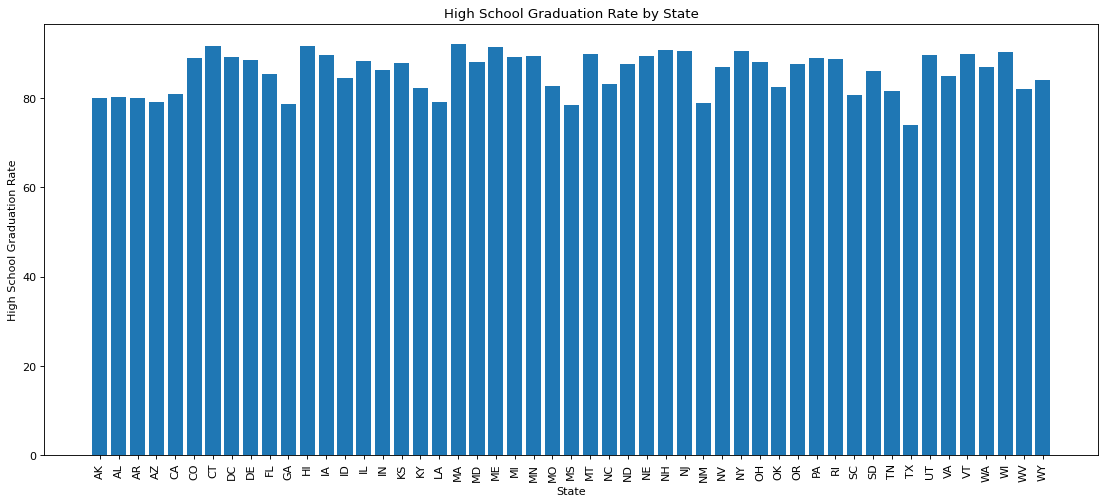

In [13]:
plt.figure(figsize=(17, 7), dpi=80)
df_pct_completed_hs_sorted_states = df_pct_completed_hs_sorted.groupby('Geographic Area').percent_completed_hs.mean()
plt.bar(df_pct_completed_hs_sorted_states.index, df_pct_completed_hs_sorted_states.values)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('High School Graduation Rate')
plt.title('High School Graduation Rate by State')
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

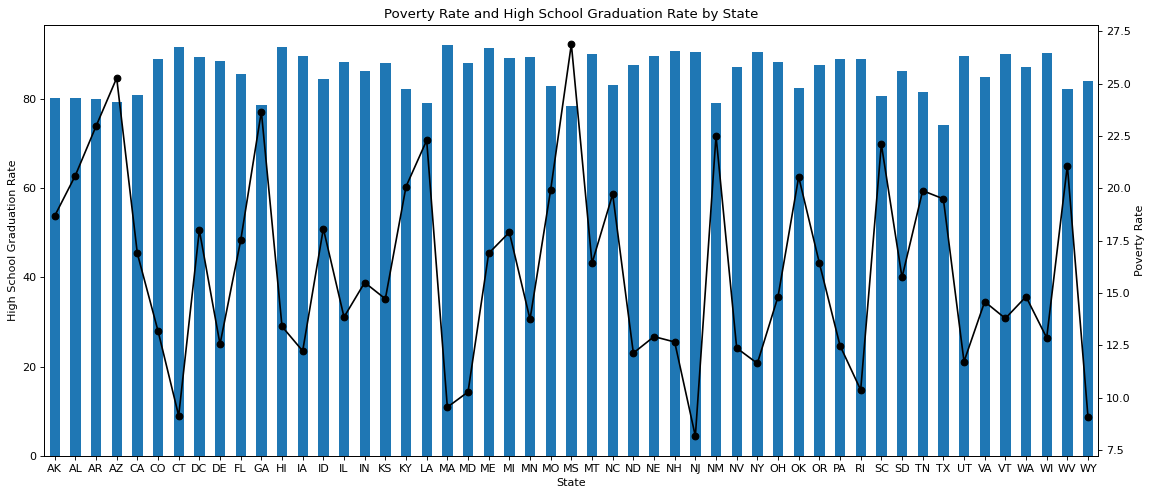

In [14]:
plt.figure(figsize=(17, 7), dpi=80)
ax = df_pct_completed_hs_sorted_states.plot(x=df_pct_completed_hs_sorted_states.values, y=[1, 2, 3, 4, 5, 6], stacked=True, kind="bar")
ax1 = df_pct_poverty_sorted_states.plot(secondary_y=True, color='k', marker='o')
ax1.set_ylabel('Poverty Rate')
ax.set_ylabel('High School Graduation Rate')
ax.set_xlabel('State')
plt.title('Poverty Rate and High School Graduation Rate by State')
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [15]:
merged_hspct = pd.merge(df_pct_completed_hs_sorted_states, df_pct_poverty_sorted_states, on='Geographic Area')
merged_hspct.head()

,percent_completed_hs,poverty_rate
Geographic Area,,
AK,80.10,18.68
AL,80.16,20.61
AR,79.95,22.96
AZ,79.22,25.27
CA,80.82,16.89


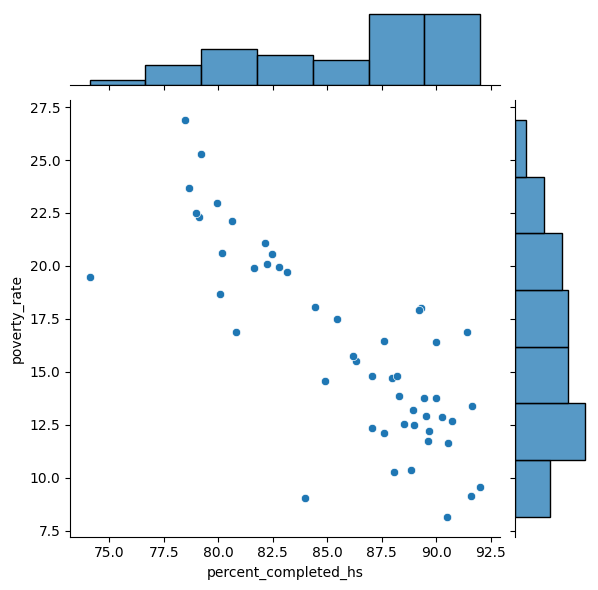

In [16]:
sns.jointplot(x='percent_completed_hs', y='poverty_rate', data=merged_hspct)

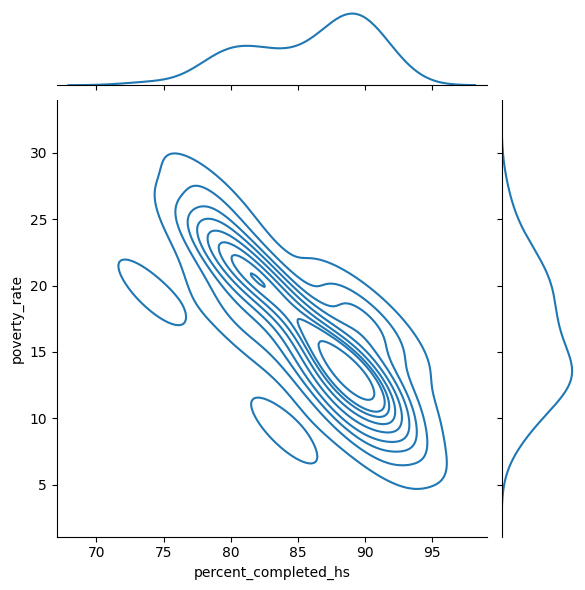

In [17]:
sns.jointplot(x='percent_completed_hs', y='poverty_rate', data=merged_hspct, kind='kde')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

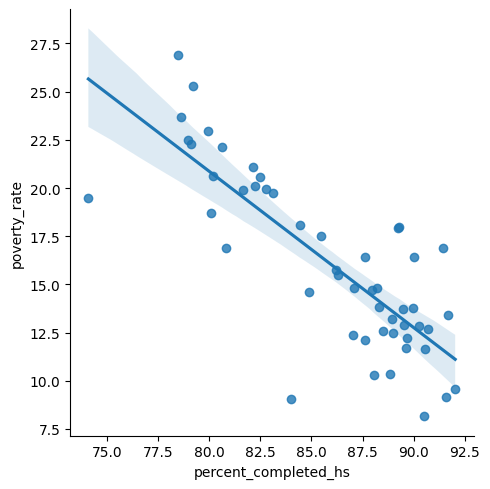

In [18]:
sns.lmplot(x='percent_completed_hs', y='poverty_rate', data=merged_hspct)

<Axes: xlabel='percent_completed_hs', ylabel='poverty_rate'>

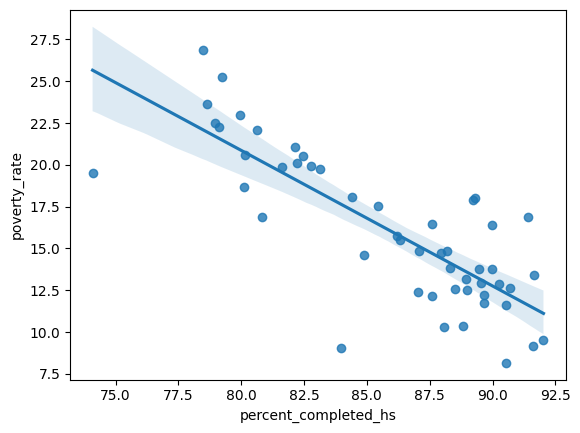

In [19]:
sns.regplot(x='percent_completed_hs', y='poverty_rate', data=merged_hspct)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [20]:
for i in df_share_race_city['share_white']:
  if i == "(X)":
    df_share_race_city['share_white'] = df_share_race_city['share_white'].replace(i, 0)
df_share_race_city['share_white'] = df_share_race_city.share_white.astype(float)

for i in df_share_race_city['share_black']:
  if i == "(X)":
    df_share_race_city['share_black'] = df_share_race_city['share_black'].replace(i, 0)
df_share_race_city['share_black'] = df_share_race_city.share_black.astype(float)

for i in df_share_race_city['share_hispanic']:
  if i == "(X)":
    df_share_race_city['share_hispanic'] = df_share_race_city['share_hispanic'].replace(i,0)
df_share_race_city['share_hispanic'] = df_share_race_city.share_hispanic.astype(float)

for i in df_share_race_city['share_asian']:
  if i == "(X)":
    df_share_race_city['share_asian'] = df_share_race_city['share_asian'].replace(i,0)
df_share_race_city['share_asian'] = df_share_race_city.share_asian.astype(float)

for i in df_share_race_city['share_native_american']:
  if i == "(X)":
    df_share_race_city['share_native_american'] = df_share_race_city['share_native_american'].replace(i,0)
df_share_race_city['share_native_american'] = df_share_race_city.share_native_american.astype(float)





In [21]:
for i in df_share_race_city['share_white']:
  df_share_race_city['share_white'] = 100 - df_share_race_city['share_black'] - df_share_race_city['share_hispanic'] - df_share_race_city['share_asian'] - df_share_race_city['share_native_american']
df_share_race_city.head()


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,68.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.00,44.90,0.50,0.30,2.30
3,AL,Addison town,99.40,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30


In [22]:
df_share_race_city_nocity = df_share_race_city.drop(columns=['City'])

In [23]:
df_share_race_city_states = df_share_race_city_nocity.groupby('Geographic area').mean()

In [24]:
df_share_race_city_states.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,50.45,0.56,45.48,1.38,2.13
AL,72.56,23.32,0.66,0.48,2.98
AR,78.19,16.30,0.76,0.48,4.27
AZ,49.58,0.95,28.59,0.73,20.14
CA,60.55,2.68,1.72,5.54,29.51


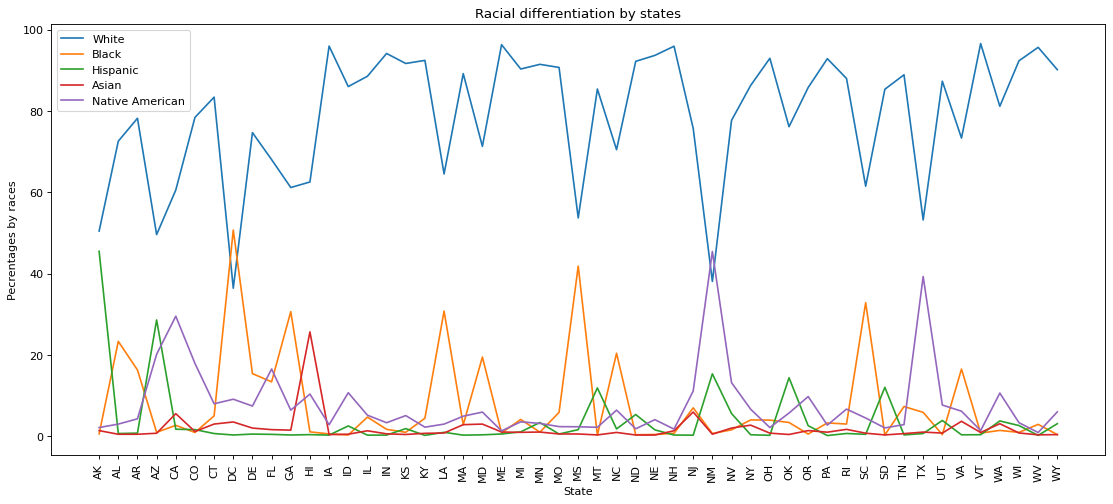

In [25]:
plt.figure(figsize=(17, 7), dpi=80)
plt.plot(df_share_race_city_states.index, df_share_race_city_states.values)
plt.xticks(rotation=90)
plt.ylabel('Pecrentages by races')
plt.xlabel('State')
plt.title('Racial differentiation by states')
plt.legend(['White', 'Black', 'Hispanic', 'Asian', 'Native American'])
plt.show()

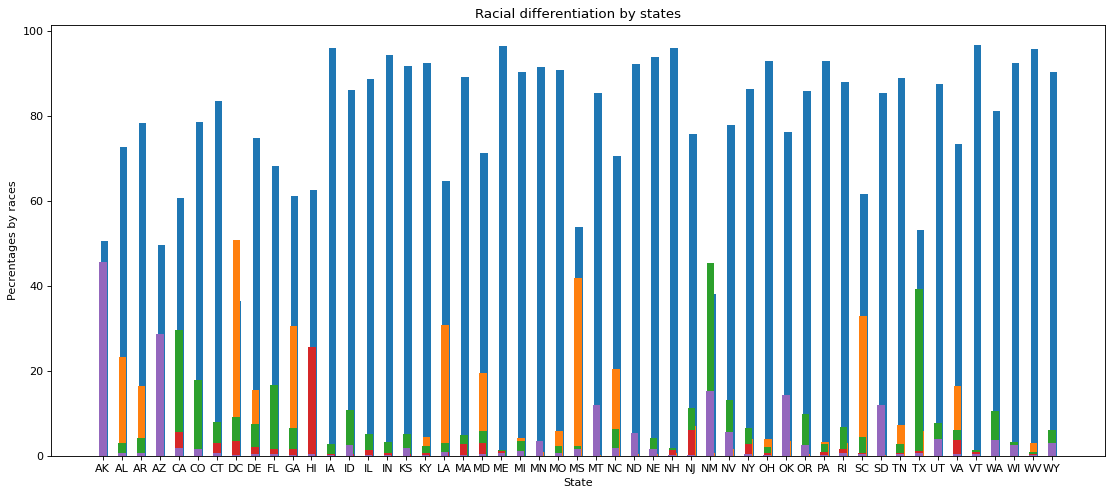

In [26]:
fig, ax = plt.subplots(figsize=(17, 7), dpi=80)
w, x = 0.4, np.arange(len(df_share_race_city_states.index))
ax.bar( x + w/4, df_share_race_city_states.share_white, width=0.4, label=df_share_race_city_states.index)
ax.bar( x + w/8,df_share_race_city_states.share_black, width=0.4, label=df_share_race_city_states.index)
ax.bar( x + w/16,df_share_race_city_states.share_hispanic, width=0.4, label=df_share_race_city_states.index)
ax.bar( x + w/20,df_share_race_city_states.share_asian, width=0.4, label=df_share_race_city_states.index)
ax.bar( x + w/40,df_share_race_city_states.share_native_american, width=0.4, label=df_share_race_city_states.index)
ax.set_xticks(x)
ax.set_xticklabels(df_share_race_city_states.index)
plt.ylabel('Pecrentages by races')
plt.xlabel('State')
plt.title('Racial differentiation by states')
plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [27]:
df_fatalities_by_race = df_fatalities.race.value_counts()

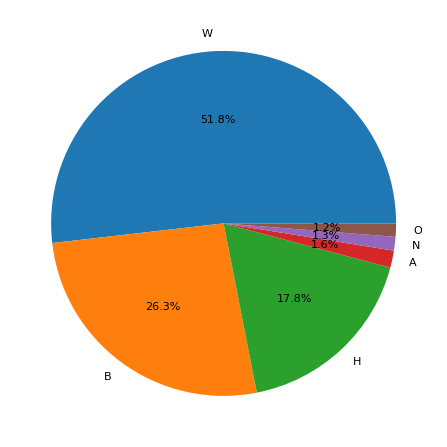

In [28]:
plt.figure(figsize=(17, 7), dpi=80)
plt.pie(df_fatalities_by_race.values, labels=df_fatalities_by_race.index, autopct='%1.1f%%')
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [29]:
df_fatalities_by_gender = df_fatalities.gender.value_counts()

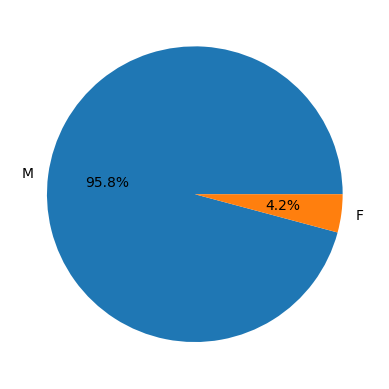

In [30]:
plt.pie(df_fatalities_by_gender.values, labels=df_fatalities_by_gender.index, autopct='%1.1f%%')
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [40]:
df_fatalities_by_gender = df_fatalities.groupby('gender').manner_of_death.value_counts()

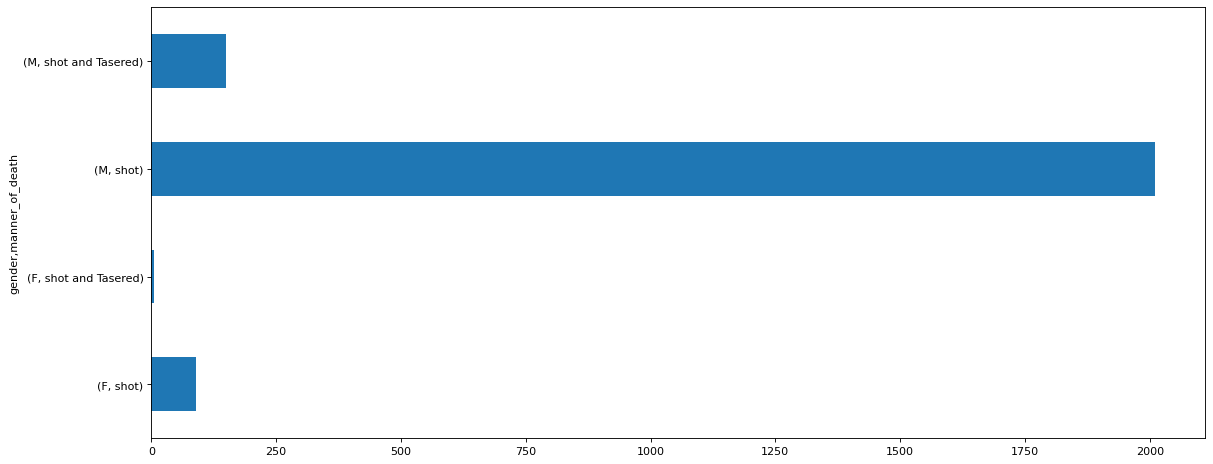

In [49]:
plt.figure(figsize=(17, 7), dpi=80)
df_fatalities_by_gender.plot(kind='barh')
plt.show()

In [50]:
print(df_fatalities_by_gender)

gender  manner_of_death 
F       shot                  89
        shot and Tasered       5
M       shot                2011
        shot and Tasered     149
Name: count, dtype: int64


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [51]:
df_fatalities_armed = df_fatalities.armed.value_counts()

In [52]:
print(df_fatalities_armed)

armed
gun                        1247
knife                       324
unarmed                     165
vehicle                     158
toy weapon                  102
                           ... 
beer bottle                   1
pipe                          1
baseball bat and bottle       1
fireworks                     1
pen                           1
Name: count, Length: 67, dtype: int64


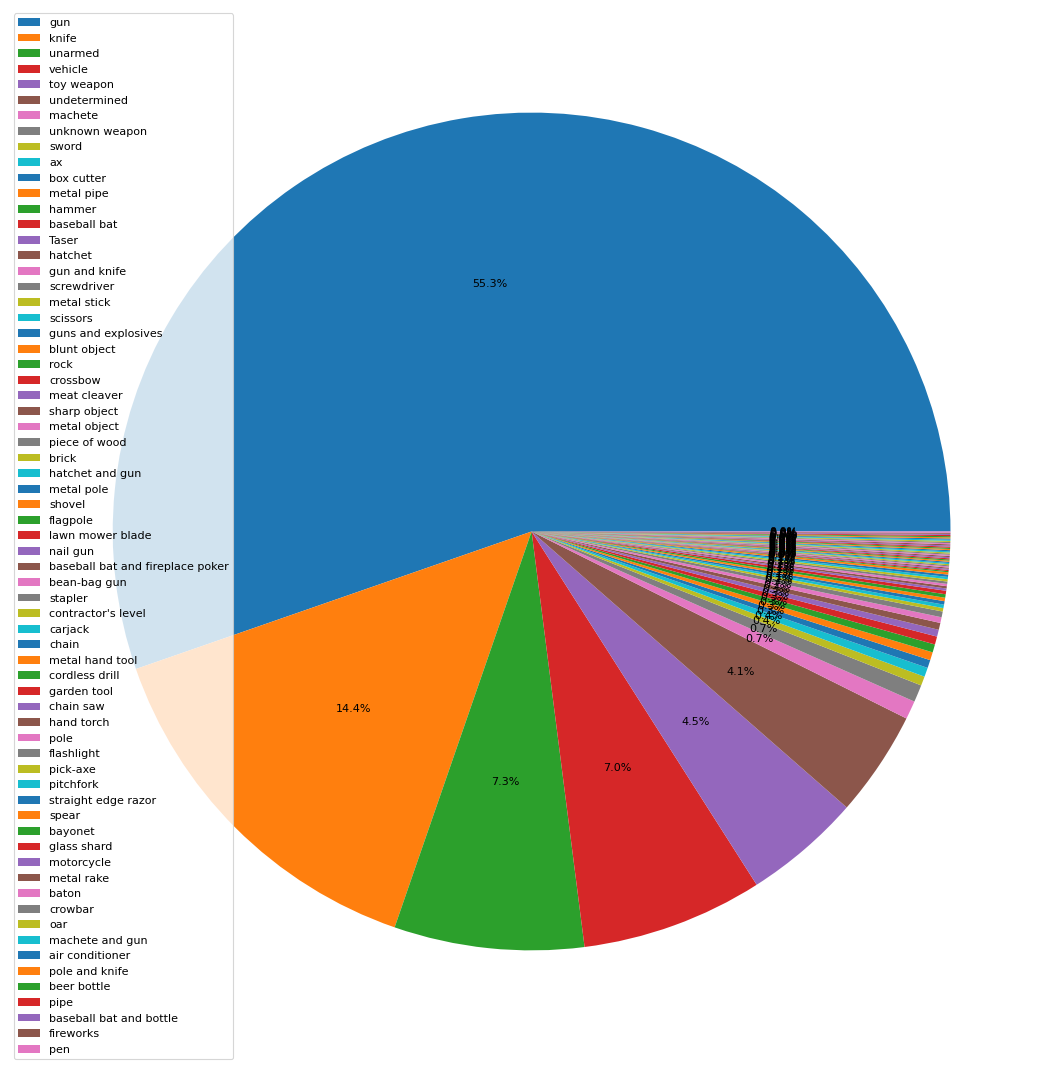

In [65]:
plt.figure(figsize=(17, 17), dpi=80)
plt.pie(df_fatalities_armed, autopct='%1.1f%%')
plt.legend(df_fatalities_armed.index)
plt.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [68]:
df_fatalities_under25 = df_fatalities[df_fatalities['age'] < 25]
print(len(df_fatalities_under25))

422


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

<Axes: xlabel='age', ylabel='Density'>

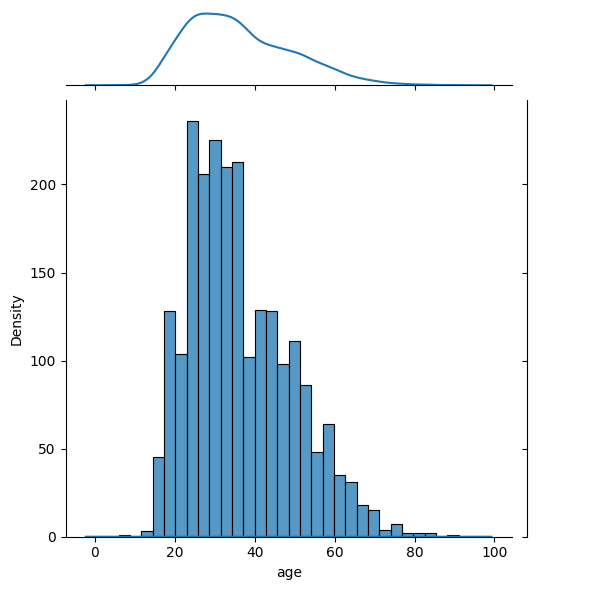

In [72]:
sns.jointplot(x='age', data=df_fatalities, kind='kde')
sns.histplot(df_fatalities['age'])

Create a seperate KDE plot for each race. Is there a difference between the distributions?

ValueError: The following variable cannot be assigned with wide-form data: `hue`

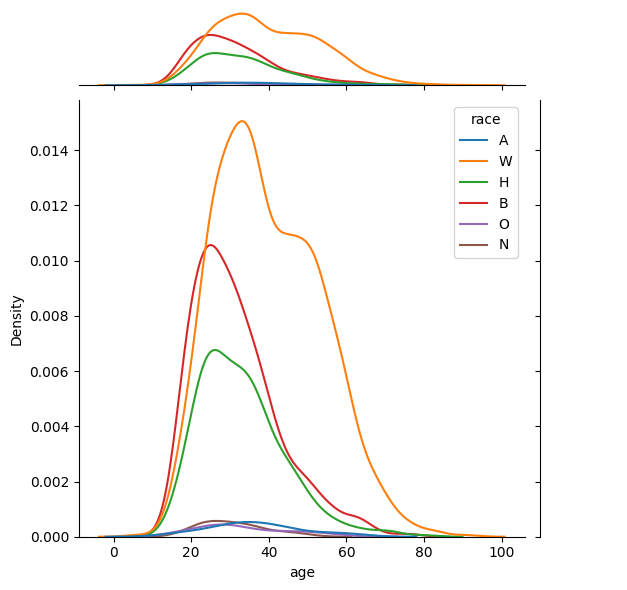

In [106]:
sns.jointplot(x='age', data=df_fatalities, hue='race', kind='kde')
sns.histplot(df_fatalities['race'])

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [118]:
df_fatalities_by_race = df_fatalities.race.value_counts()

<Axes: xlabel='race'>

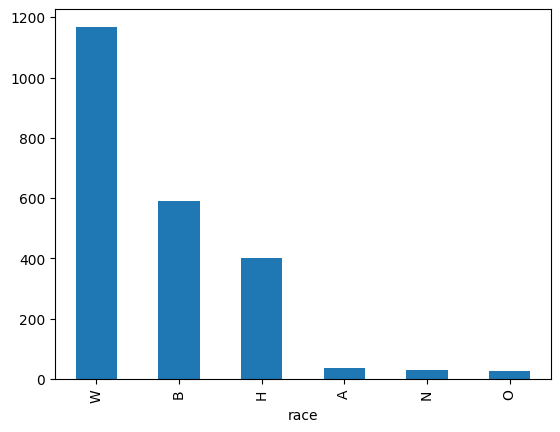

In [119]:
df_fatalities_by_race.plot(kind='bar')

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [123]:
df_fatalities.signs_of_mental_illness.value_counts()

,count
signs_of_mental_illness,
False,1681
True,573


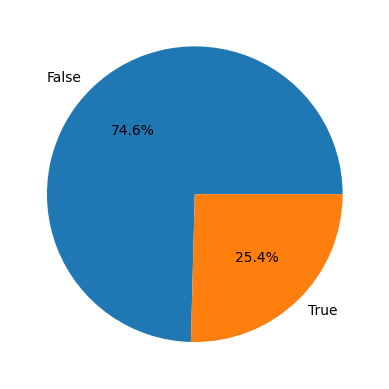

In [124]:
plt.pie(df_fatalities.signs_of_mental_illness.value_counts(), labels=df_fatalities.signs_of_mental_illness.value_counts().index, autopct='%1.1f%%')
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [127]:
df_fatalities.city.value_counts().head(10)

,count
city,
Los Angeles,35
Phoenix,28
Houston,24
Chicago,22
Austin,18
Las Vegas,17
Columbus,16
San Antonio,15
Miami,15


<Axes: xlabel='city'>

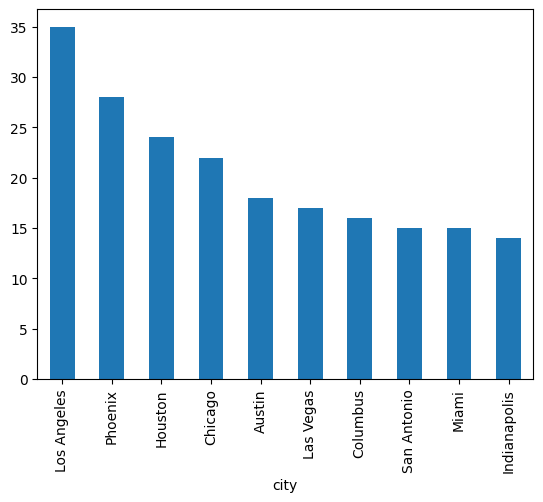

In [128]:
df_fatalities.city.value_counts().head(10).plot(kind='bar')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [136]:
cities_with_most_death = df_fatalities.city.value_counts().head(10).index

In [143]:
df_fatalities_by_city = df_fatalities[df_fatalities['city'].isin(cities_with_most_death)]
print(df_fatalities_by_city.groupby('city').race.value_counts())

city          race
Austin        W       13
              B        3
              H        2
Chicago       B       19
              W        2
              H        1
Columbus      B        9
              W        6
              O        1
Houston       B       14
              H        5
              W        3
              A        1
              N        1
Indianapolis  B        9
              W        5
Las Vegas     W        9
              H        5
              B        3
Los Angeles   H       18
              B       10
              W        6
              A        1
Miami         B        7
              H        6
              W        2
Phoenix       W       12
              H       11
              N        3
              B        2
San Antonio   H       11
              B        2
              W        2
Name: count, dtype: int64


<Axes: xlabel='city,race'>

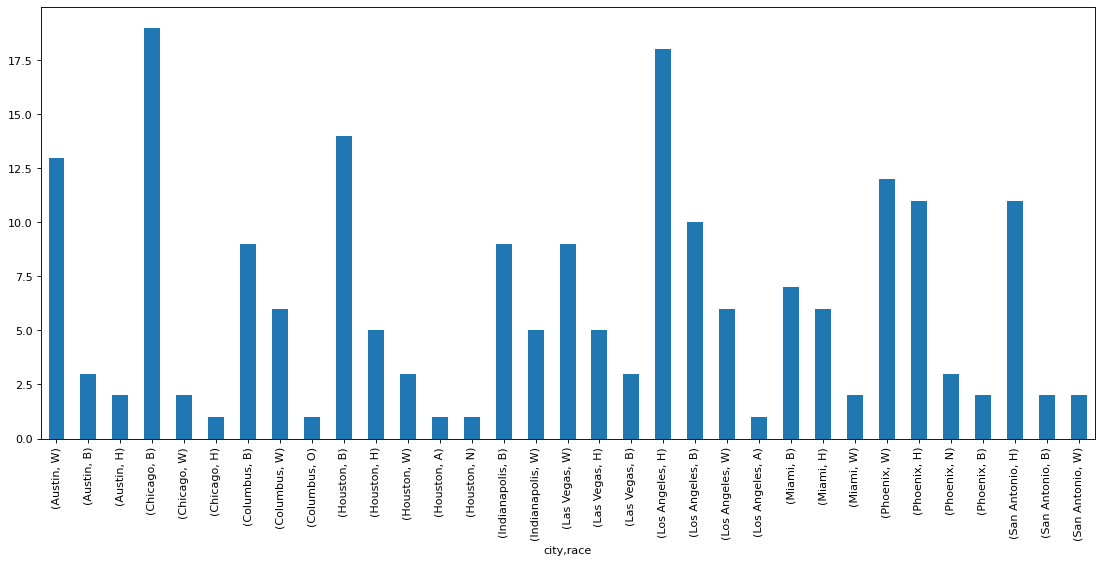

In [144]:
plt.figure(figsize=(17, 7), dpi=80)
df_fatalities_by_city.groupby('city').race.value_counts().plot(kind="bar")

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [190]:
df_fatalities_by_state = df_fatalities.groupby('state').id.count()

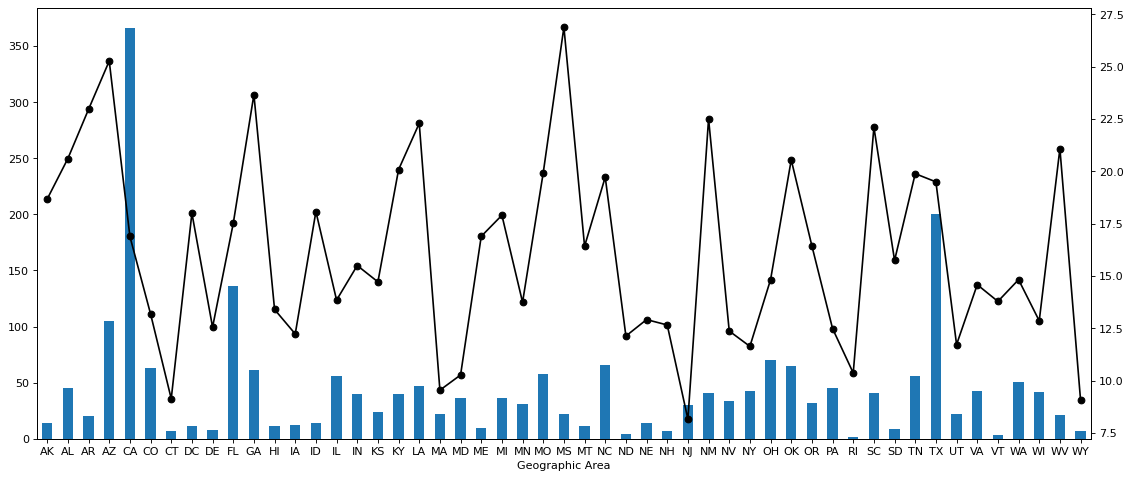

In [197]:
plt.figure(figsize=(17, 7), dpi=80)
df_fatalities_by_state.plot(kind='bar')
ax1 = df_pct_poverty_sorted_states.plot(secondary_y=True, color='k', marker='o')
fig = px.choropleth(df_fatalities_by_state, locations= df_fatalities.index, color=df_fatalities.id.values,
                           color_continuous_scale="Viridis",
                           range_color=(0, 500),
                           scope="usa",)
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [202]:
df_fatalities['year'] = pd.DatetimeIndex(df_fatalities['date']).year

In [204]:
df_fatalities.groupby('year').id.count()

,id
year,
2015,947
2016,873
2017,434


In [206]:
df_fatalities_by_year = df_fatalities.groupby('year').id.count()

<Axes: xlabel='year'>

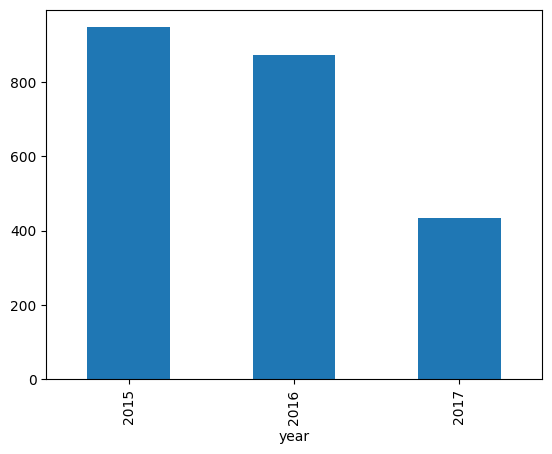

In [208]:
df_fatalities_by_year.plot(kind='bar')

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

In [ ]:
# This is the finish of this data analysis.